In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Product_data.csv')

In [4]:
print(df.head())

     everyday productid                 productname  quantity
0  2023-08-16   D_10006                CURD - 200 G      60.0
1  2023-08-16   D_10029  STANDARDISED MILK - 500 ml      48.0
2  2023-08-16   D_10006                CURD - 200 G      60.0
3  2023-08-16   D_10017  DOUBLE TONED MILK - 500 ml      72.0
4  2023-08-16   D_10033         TONED MILK - 500 ml      24.0


In [5]:
df.shape

(2516944, 4)

In [6]:
# Filter for product ID D_10006
df_filtered = df[df['productid'] == 'D_10033']

# Group by date and sum quantity
df_grouped = df_filtered.groupby('everyday')['quantity'].sum().reset_index()

#everyday datatype changed into datetime
df_grouped['everyday'] = pd.to_datetime(df_grouped['everyday'])

In [7]:
# Set 'date' column as the index
df_grouped.set_index('everyday', inplace=True)

In [8]:
print(df_grouped)

            quantity
everyday            
2022-10-01  130852.0
2022-10-02  127512.0
2022-10-03  137324.0
2022-10-04  138888.0
2022-10-05  118848.0
...              ...
2023-08-17   19368.0
2023-08-18   19800.0
2023-08-19   19272.0
2023-08-20   22104.0
2023-08-21   21648.0

[325 rows x 1 columns]


In [9]:
df_grouped.shape

(325, 1)

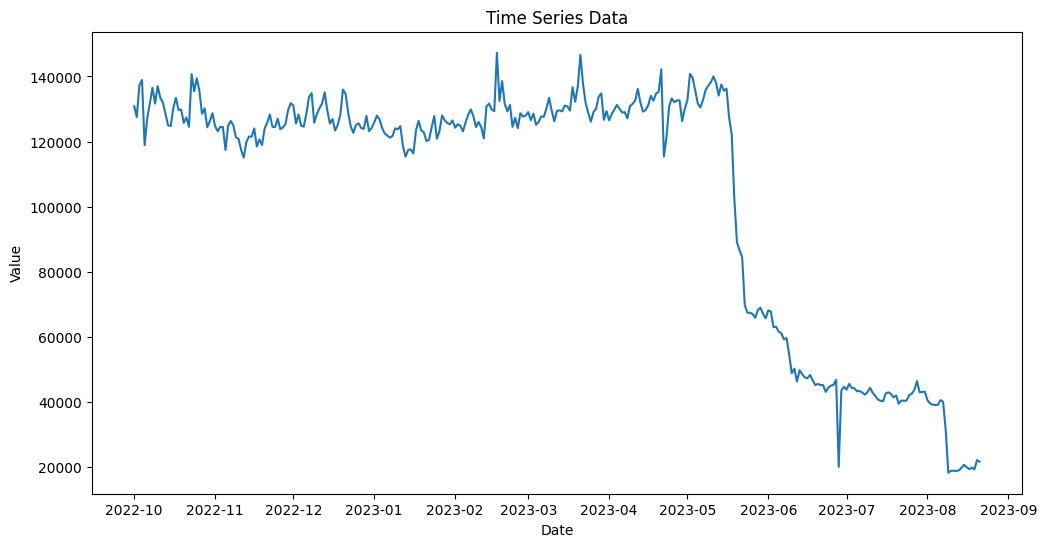

In [10]:
# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(df_grouped['quantity'])
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

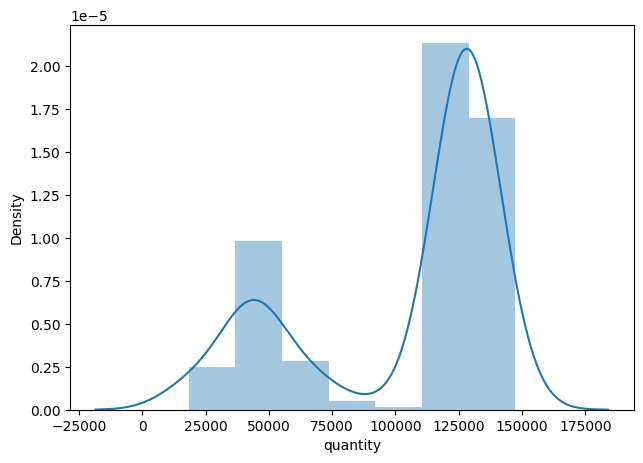

In [11]:
#detecting outlier in Quantity Columns Using Z Score Technique
plt.figure(figsize=(16,5))
plt.subplot(1,2,2)
sns.distplot(df_grouped['quantity'])
plt.show()

In [12]:
df_grouped['quantity'].skew()

-1.0206030989972392

In [13]:
print("Mean vlaue of Quantity", df_grouped['quantity'].mean())
print("Std vlaue of Quantity", df_grouped['quantity'].std())
print("Min vlaue of Quantity", df_grouped['quantity'].min())
print("Max vlaue of Quantity", df_grouped['quantity'].max())

Mean vlaue of Quantity 104229.95692307693
Std vlaue of Quantity 38877.58044928633
Min vlaue of Quantity 18240.0
Max vlaue of Quantity 147276.0


In [17]:
# Finding the boundary values
print("Highest allowed", df_grouped['quantity'].mean() + 3*df_grouped['quantity'].std())
print("Lowest allowed", df_grouped['quantity'].mean() - 3*df_grouped['quantity'].std())

Highest allowed 220862.6982709359
Lowest allowed -12402.784424782076


In [18]:
# Finding the outliers
df_grouped[(df_grouped['quantity'] > 220862.69) | (df_grouped['quantity'] < -12402.78)]

,quantity
everyday,
